<a href="https://colab.research.google.com/github/mbjallow6/Algorithms-python/blob/main/momodou_jallow_721667_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files

# This will prompt you to upload the kaggle.json
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mbjallow6","key":"2ec9a474cc344212d6724ed98207fdc8"}'}

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download rohanrao/formula-1-world-championship-1950-2020


  0% 0.00/5.76M [00:00<?, ?B/s]
100% 5.76M/5.76M [00:00<00:00, 154MB/s]


In [10]:
!unzip \*.zip  && rm *.zip


Archive:  formula-1-world-championship-1950-2020.zip
  inflating: circuits.csv            
  inflating: constructor_results.csv  
  inflating: constructor_standings.csv  
  inflating: constructors.csv        
  inflating: driver_standings.csv    
  inflating: drivers.csv             
  inflating: lap_times.csv           
  inflating: pit_stops.csv           
  inflating: qualifying.csv          
  inflating: races.csv               
  inflating: results.csv             
  inflating: seasons.csv             
  inflating: sprint_results.csv      
  inflating: status.csv              


In [11]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def load_data(file_name: str) -> pd.DataFrame:
    """Loads a csv file into a pandas DataFrame."""
    return pd.read_csv(file_name)

def convert_to_datetime(df: pd.DataFrame, column: str, format: str = '%Y-%m-%d') -> pd.DataFrame:
    """Convert a column to datetime format."""
    df[column] = pd.to_datetime(df[column], format=format, errors='coerce')
    return df

def calculate_age(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """Calculate age based on date of birth."""
    df[column] = (pd.to_datetime('today') - df[column]).apply(lambda x: int(x.days/365.25))
    return df

def encode_categorical(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """Encode a categorical column."""
    df = pd.get_dummies(df, columns=[column])
    return df

def fill_missing(df: pd.DataFrame, column: str, value) -> pd.DataFrame:
    """Fill missing values in a column."""
    df[column] = df[column].fillna(value)
    return df

def drop_columns(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """Drop unnecessary columns."""
    df = df.drop(columns=columns, axis=1)
    return df

def handle_outliers(df: pd.DataFrame, column: str, method: str = 'iqr') -> pd.DataFrame:
    """Handle outliers in a column using the IQR method or by replacing them with a specified value."""
    if method == 'iqr':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    else:
        df[column] = np.where((df[column] < df[column].quantile(0.25)) | (df[column] > df[column].quantile(0.75)), df[column].median(), df[column])
    return df

def convert_time_to_seconds(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """Convert a time column to seconds."""
    df[column] = df[column].apply(lambda x: sum(int(i) * 60**index for index, i in enumerate(reversed(x.split(":")))))
    return df

def find_na(df_dict: dict) -> dict:
    """Find dataframes and columns with NA or Null values."""
    na_dict = {}
    for name, df in df_dict.items():
        na_cols = df.columns[df.isna().any()].tolist()
        if na_cols:
            na_dict[name] = na_cols
    return na_dict

def drop_na_rows(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """Drop rows from the dataframe where column value is NA."""
    df = df.dropna(subset=[column])
    return df

def count_na(df_dict: dict) -> dict:
    """Count the number of NA values in each column for each dataframe."""
    na_count_dict = {}
    for name, df in df_dict.items():
        na_count = df.isna().sum().to_dict()
        if any(na_count.values()):  # if there are any NA values
            na_count_dict[name] = na_count
    return na_count_dict

def categorize_results(results):
    """Categorize results into 'On-Podium' and 'Not-On-Podium'."""
    podium_positions = [1, 2, 3]  # usually podium positions are the top 3
    results['podium'] = results['positionOrder'].apply(lambda x: 'On-Podium' if x in podium_positions else 'Not-On-Podium')
    return results


# def find_na(df_dict: dict) -> dict:
#     """Find dataframes and columns with NA, Null values or '\N' entries."""
#     na_dict = {}
#     for name, df in df_dict.items():
#         na_cols = df.columns[(df.isna().any()) | (df == "\\N").any()].tolist()
#         if na_cols:
#             na_dict[name] = na_cols
#     return na_dict

In [12]:
def load_data(file_name: str) -> pd.DataFrame:
    """Loads a csv file into a pandas DataFrame."""
    return pd.read_csv(file_name)



circuits = load_data('circuits.csv')
constructor_results = load_data('constructor_results.csv')
constructor_standings = load_data('constructor_standings.csv')
constructors = load_data('constructors.csv')
driver_standings = load_data('driver_standings.csv')
drivers = load_data('drivers.csv')
lap_times = load_data('lap_times.csv')
pit_stops = load_data('pit_stops.csv')
qualifying = load_data('qualifying.csv')
races = load_data('races.csv')
results = load_data('results.csv')
seasons = load_data('seasons.csv')
sprint_results = load_data('sprint_results.csv')
status = load_data('status.csv')


In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def count_missing_values(df):
    return df.isnull().sum()

def fill_missing(df, column, value):
    df[column] = df[column].fillna(value)
    return df

def remove_duplicates(df):
    return df.drop_duplicates()

def encode_categorical(df, column):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    return df

def drop_columns(df, cols_to_drop):
    df.drop(cols_to_drop, axis=1, inplace=True)
    return df

def handle_missing_values(df):
    for col in df.columns:
        # If the number of missing values is less than 5% of the total data, we'll drop those rows
        if df[col].isnull().sum() < (0.05 * len(df)):
            df.dropna(subset=[col], inplace=True)
        else:
            # If the column is numeric, fill missing values with its median
            if pd.api.types.is_numeric_dtype(df[col]):
                df[col].fillna(df[col].median(), inplace=True)
            else:
                # If the column is categorical, fill missing values with its mode
                df[col].fillna(df[col].mode()[0], inplace=True)
    return df


In [28]:
dataframes_and_columns_to_drop = {
    'drivers': ['url'],
    'results': ['positionText'],
    'races': ['url', 'date', 'time', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
}

In [29]:
dataframes = {'drivers': drivers, 'results': results, 'races': races}

In [30]:
for df_name, df in dataframes.items():
    # Drop unnecessary columns
    if df_name in dataframes_and_columns_to_drop.keys():
        df = drop_columns(df, dataframes_and_columns_to_drop[df_name])

    # Handle missing values
    df = handle_missing_values(df)

    # Remove duplicates
    df = remove_duplicates(df)

    # Encode categorical variables
    for col in df.columns:
        if df[col].dtype == 'object':
            df = encode_categorical(df, col)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(df, column):
    """Plot distribution of a column."""
    sns.displot(df[column])
    plt.show()

def plot_box(df, column):
    """Plot boxplot of a column."""
    sns.boxplot(x=df[column])
    plt.show()

def plot_correlation_matrix(df):
    """Plot correlation matrix."""
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True)
    plt.show()

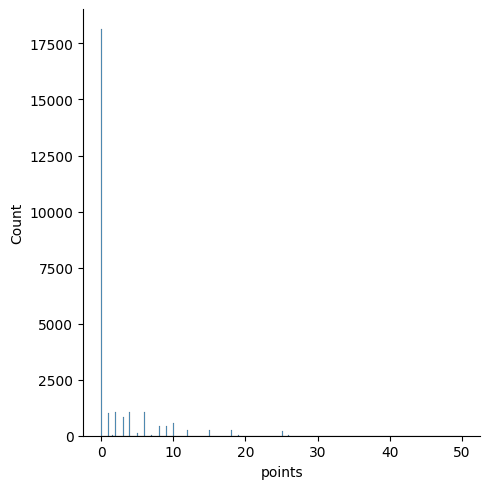

In [ ]:
# For instance, to understand the distribution of 'points' in 'results', we call:
plot_distribution(results, 'points')

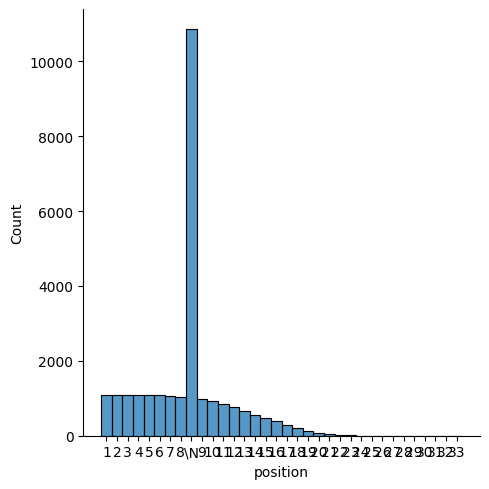

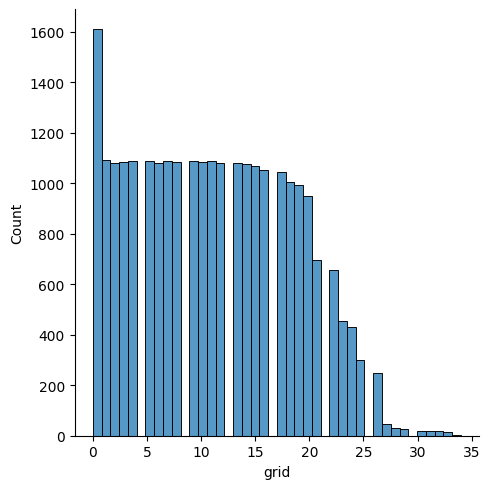

<ipython-input-12-1ab3b75d8361>:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


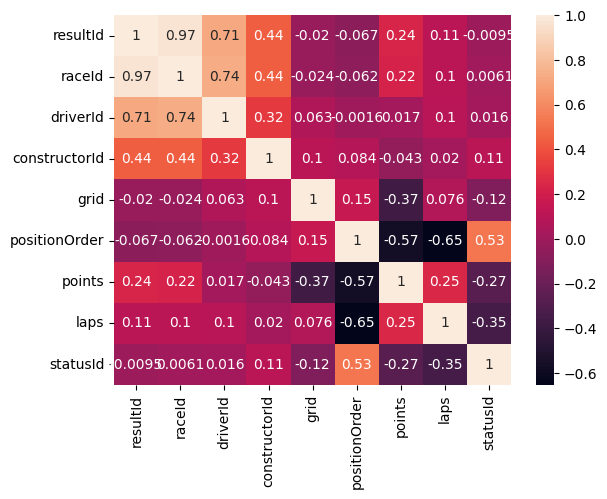

In [ ]:
# To understand the distribution of 'position' in 'results', we call:
plot_distribution(results, 'position')

# To understand the distribution of 'grid' in 'results', we call:
plot_distribution(results, 'grid')

# To understand the relationship between variables in 'results', we call:
plot_correlation_matrix(results)

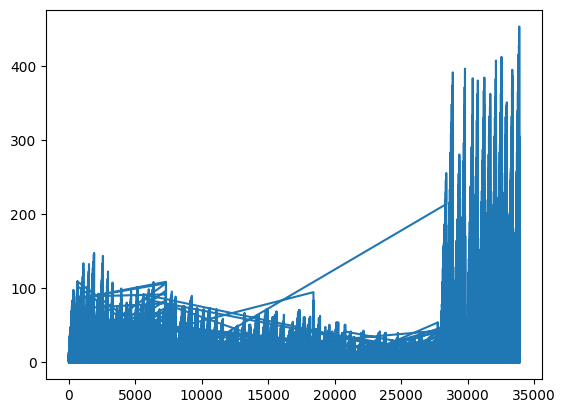

Mean of grid: 11.17906346749226
Mean of positionOrder: 12.876006191950465


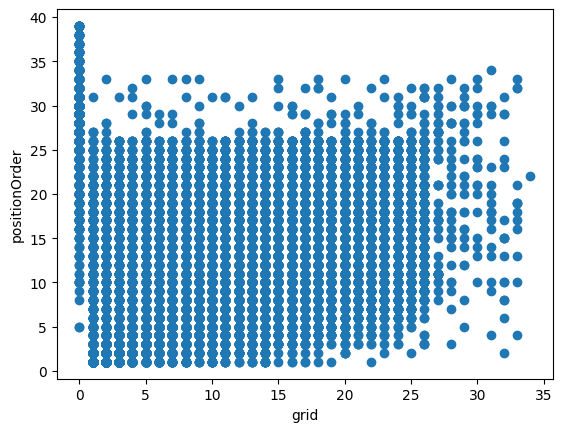

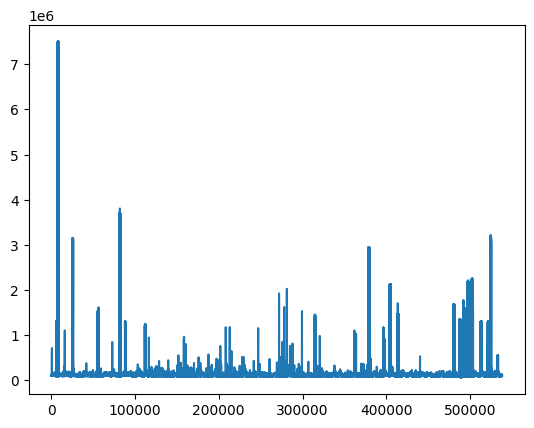

Mean of lap: 29.96546129959619
Mean of milliseconds: 95720.7926377153


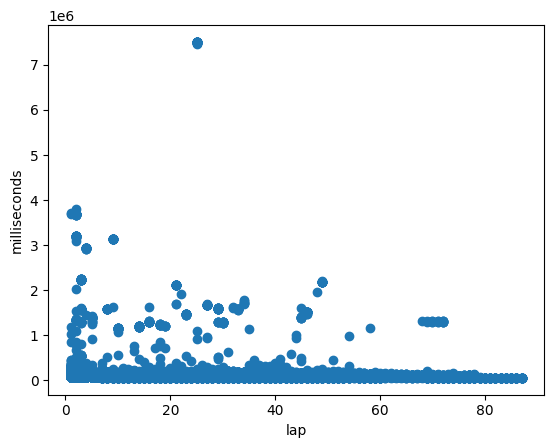

In [ ]:
def analyze_trend(df, column):
    """Analyze trend of a column."""
    df[column].plot()
    plt.show()

def compare_means(df, column1, column2):
    """Compare means of two columns."""
    mean1 = df[column1].mean()
    mean2 = df[column2].mean()
    print(f'Mean of {column1}: {mean1}')
    print(f'Mean of {column2}: {mean2}')

def analyze_relationship(df, column1, column2):
    """Analyze relationship between two columns."""
    plt.scatter(df[column1], df[column2])
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.show()

# Analyzing trend of 'points' in 'driver_standings' over time
driver_standings_sorted_by_raceId = driver_standings.sort_values('raceId')
analyze_trend(driver_standings_sorted_by_raceId, 'points')

# Comparing means of 'grid' and 'position' in 'results'
compare_means(results, 'grid', 'positionOrder')

# Analyzing relationship between 'grid' and 'positionOrder' in 'results'
analyze_relationship(results, 'grid', 'positionOrder')

# Analyzing trend of 'milliseconds' in 'lap_times' over time
lap_times_sorted_by_raceId = lap_times.sort_values('raceId')
analyze_trend(lap_times_sorted_by_raceId, 'milliseconds')

# Comparing means of 'lap' and 'milliseconds' in 'lap_times'
compare_means(lap_times, 'lap', 'milliseconds')

# Analyzing relationship between 'lap' and 'milliseconds' in 'lap_times'
analyze_relationship(lap_times, 'lap', 'milliseconds')

# You would repeat similar analyses for other dataframes and columns based on what you find interesting or relevant


In [31]:
# Feature engineering
features = pd.DataFrame()

# From 'results', we take 'raceId', 'driverId', 'constructorId', 'grid', 'positionOrder', 'points', 'laps', 'milliseconds'
results_required_cols = ['raceId', 'driverId', 'constructorId', 'grid', 'positionOrder', 'points', 'laps', 'milliseconds']
features = results[results_required_cols]

# From 'driver_standings', we take 'points', 'position', 'wins'
driver_standings_required_cols = ['raceId', 'driverId', 'points', 'position', 'wins']
features = pd.merge(features, driver_standings[driver_standings_required_cols], on=['raceId', 'driverId'])

# From 'constructor_standings', we take 'points', 'position', 'wins'
constructor_standings_required_cols = ['raceId', 'constructorId', 'points', 'position', 'wins']
features = pd.merge(features, constructor_standings[constructor_standings_required_cols], on=['raceId', 'constructorId'], suffixes=('_driver', '_constructor'))

# Let's add the 'name' (name of the circuit) from 'races'
races_required_cols = ['raceId', 'circuitId']
features = pd.merge(features, races[races_required_cols], on='raceId')

# Adding circuit details from 'circuits'
circuits_required_cols = ['circuitId', 'name']
features = pd.merge(features, circuits[circuits_required_cols], on='circuitId')


In [32]:
import numpy as np

# Prepare target variable
features['positionLabel'] = pd.cut(features['positionOrder'], bins=[0, 3, 10, np.inf], labels=['Podium', 'Top_10', 'Below_10'])


In [33]:
from sklearn.model_selection import train_test_split

# Creating feature matrix and target vector
X = features.drop(['positionOrder', 'positionLabel'], axis=1)
y = features['positionLabel']

# Converting categorical features into numeric
X = pd.get_dummies(X, drop_first=True)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Define a dictionary mapping the strings to integers
class_mapping = {'Below_10': 0, 'Podium': 1, 'Top_10': 2}

# Use the 'map' function to apply this mapping to the target variables
y_train = y_train.map(class_mapping)
y_test = y_test.map(class_mapping)  # if you have a test set

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Initializing the models
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)
svc = SVC(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)

# Creating a list of models
models = [rf, xgb, lgbm, svc, gbc]
model_names = ['Random Forest', 'XGBoost', 'LightGBM', 'SVC', 'Gradient Boosting Classifier']

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: Accuracy: {scores.mean()} (+/- {scores.std() * 2})")

Random Forest: Accuracy: 0.8941929419778356 (+/- 0.009017947736672565)
XGBoost: Accuracy: 0.9316948201770348 (+/- 0.003925299213942562)
LightGBM: Accuracy: 0.933962808316833 (+/- 0.00495196906357124)
SVC: Accuracy: 0.7248801013281512 (+/- 0.011856944867829315)
Gradient Boosting Classifier: Accuracy: 0.9143414699705165 (+/- 0.004316139199012958)


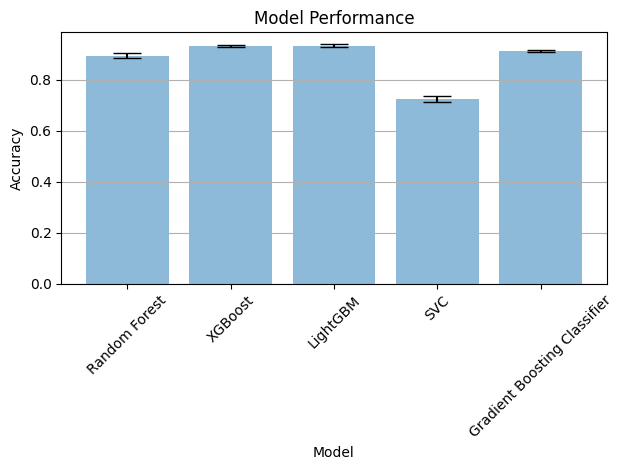

In [35]:
import matplotlib.pyplot as plt

# Calculate the accuracies and standard deviations
accuracies = [0.894, 0.932, 0.934, 0.725, 0.914]
std_devs = [0.009, 0.004, 0.005, 0.012, 0.004]

# Create a figure and axis
fig, ax = plt.subplots()

# Create a bar chart
ax.bar(model_names, accuracies, yerr=std_devs, align='center', alpha=0.5, ecolor='black', capsize=10)

# Customize the chart
ax.set_ylabel('Accuracy')
ax.set_xlabel('Model')
ax.set_title('Model Performance')
ax.yaxis.grid(True)

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [36]:
from sklearn.metrics import classification_report, confusion_matrix

for model, name in zip(models, model_names):
    print(f"Model: {name}")
    y_pred = model.predict(X_test)

    # Print the classification report
    print(classification_report(y_test, y_pred))

    # Print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: ")
    print(cm)
    print("-"*50)


Model: Random Forest
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2761
           1       0.94      0.90      0.92       589
           2       0.88      0.78      0.83      1390

    accuracy                           0.91      4740
   macro avg       0.91      0.88      0.90      4740
weighted avg       0.90      0.91      0.90      4740

Confusion Matrix: 
[[2679    0   82]
 [   0  529   60]
 [ 274   33 1083]]
--------------------------------------------------
Model: XGBoost
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2761
           1       1.00      1.00      1.00       589
           2       0.90      0.89      0.89      1390

    accuracy                           0.94      4740
   macro avg       0.95      0.95      0.95      4740
weighted avg       0.94      0.94      0.94      4740

Confusion Matrix: 
[[2627    0  134]
 [   0  588    1]
 [ 158    1 1231]]
---

Model: Random Forest
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2761
           1       0.94      0.90      0.92       589
           2       0.88      0.78      0.83      1390

    accuracy                           0.91      4740
   macro avg       0.91      0.88      0.90      4740
weighted avg       0.90      0.91      0.90      4740



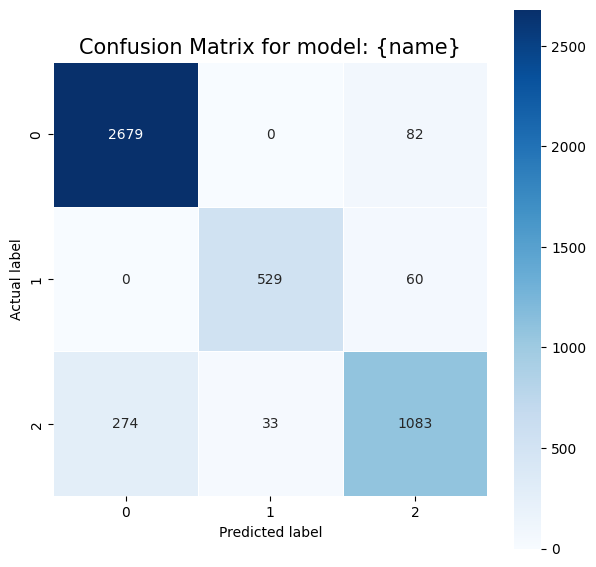

--------------------------------------------------
Model: XGBoost
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2761
           1       1.00      1.00      1.00       589
           2       0.90      0.89      0.89      1390

    accuracy                           0.94      4740
   macro avg       0.95      0.95      0.95      4740
weighted avg       0.94      0.94      0.94      4740



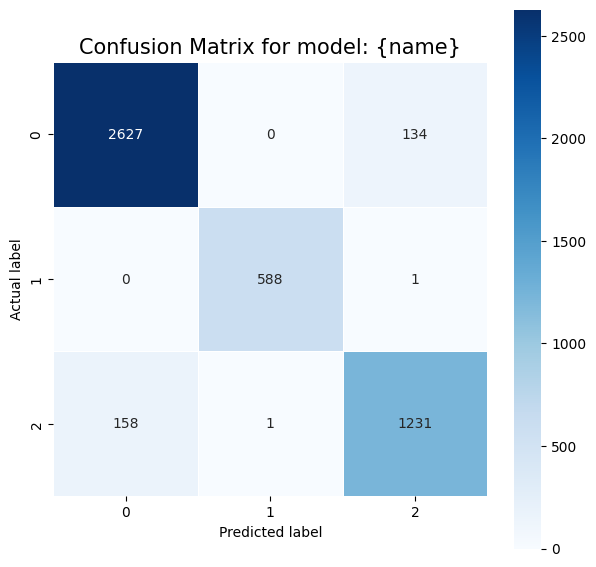

--------------------------------------------------
Model: LightGBM
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2761
           1       1.00      1.00      1.00       589
           2       0.90      0.89      0.89      1390

    accuracy                           0.94      4740
   macro avg       0.95      0.95      0.95      4740
weighted avg       0.94      0.94      0.94      4740



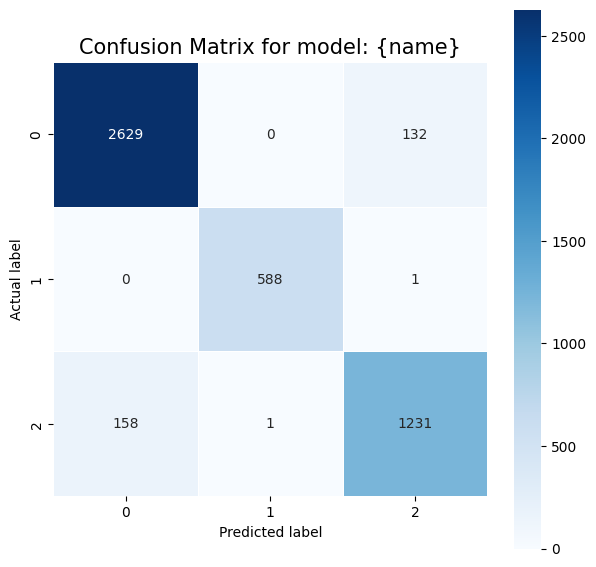

--------------------------------------------------
Model: SVC
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      2761
           1       0.71      0.41      0.52       589
           2       0.57      0.63      0.60      1390

    accuracy                           0.74      4740
   macro avg       0.71      0.64      0.66      4740
weighted avg       0.74      0.74      0.74      4740



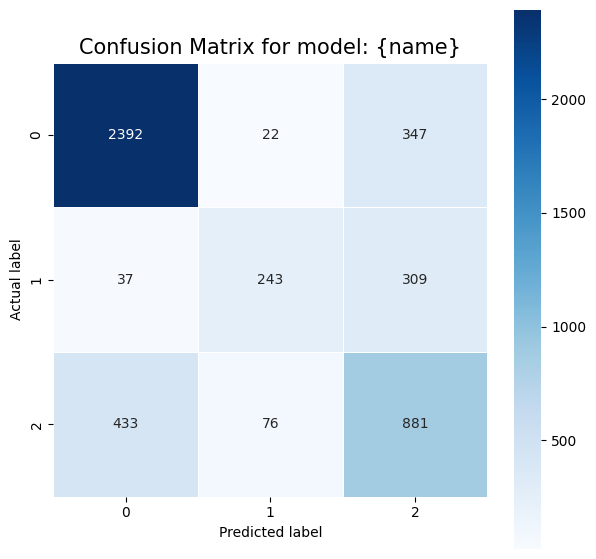

--------------------------------------------------
Model: Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2761
           1       0.99      0.99      0.99       589
           2       0.91      0.82      0.86      1390

    accuracy                           0.92      4740
   macro avg       0.94      0.92      0.93      4740
weighted avg       0.92      0.92      0.92      4740



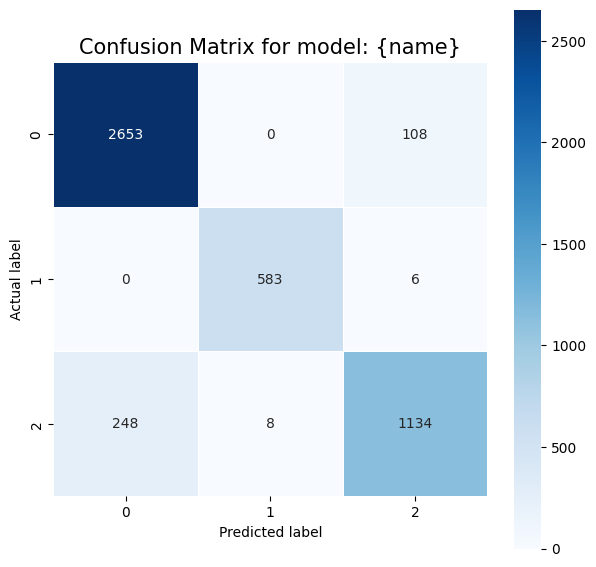

--------------------------------------------------


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

for model, name in zip(models, model_names):
    print(f"Model: {name}")
    y_pred = model.predict(X_test)

    # Print the classification report
    print(classification_report(y_test, y_pred))

    # Print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualize the confusion matrix
    plt.figure(figsize=(7,7))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    plt.title('Confusion Matrix for model: {name}', size = 15);
    plt.show()

    print("-"*50)


In [23]:
# Define a dictionary mapping the strings to integers
class_mapping = {'Below_10': 0, 'Podium': 1, 'Top_10': 2}

# Use the 'map' function to apply this mapping to the target variables
y_train = y_train.map(class_mapping)
y_test = y_test.map(class_mapping)  # if you have a test set

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Initializing the models
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)
svc = SVC(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)

# Creating a list of models
models = [rf, xgb, lgbm, svc, gbc]
model_names = ['Random Forest', 'XGBoost', 'LightGBM', 'SVC', 'Gradient Boosting Classifier']

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: Accuracy: {scores.mean()} (+/- {scores.std() * 2})")


Random Forest: Accuracy: 0.8941929419778356 (+/- 0.009017947736672565)
XGBoost: Accuracy: 0.9316948201770348 (+/- 0.003925299213942562)
LightGBM: Accuracy: 0.933962808316833 (+/- 0.00495196906357124)
SVC: Accuracy: 0.7248801013281512 (+/- 0.011856944867829315)
Gradient Boosting Classifier: Accuracy: 0.9143414699705165 (+/- 0.004316139199012958)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [62]:
# We need to merge few datasets to get required data.
# Merging drivers and results
df = pd.merge(drivers, results, on='driverId')
df.head()



,driverId,driverRef,number_x,code,forename,surname,dob,nationality,resultId,raceId,...,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,1,18,...,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,27,19,...,5,4.0,56,+46.548,5525103,53,3,1:35.462,209.033,1
2,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,57,20,...,13,0.0,56,None,None,25,19,1:35.520,203.969,11
3,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,69,21,...,3,6.0,66,+4.187,5903238,20,3,1:22.017,204.323,1
4,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,90,22,...,2,8.0,58,+3.779,5213230,31,2,1:26.529,222.085,1


In [13]:
# Merge drivers and results
df = pd.merge(drivers, results, on='driverId')

# Merge the above with races
df = pd.merge(df, races, on='raceId')

# Sort values by driverId and year
df.sort_values(['driverId', 'year'], inplace=True)


In [14]:
# Average ranking in previous races
df['average_ranking'] = df.groupby('driverId')['positionOrder'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())

# Total points in previous races
df['total_points'] = df.groupby('driverId')['points'].transform(lambda x: x.rolling(window=5, min_periods=1).sum())

# Convert 'milliseconds' to numeric
df['milliseconds'] = pd.to_numeric(df['milliseconds'], errors='coerce')

# Now, create the 'average_lap_time' feature
df['average_lap_time'] = df.groupby('driverId')['milliseconds'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())


# Average time taken in previous races
# df['average_lap_time'] = df.groupby('driverId')['milliseconds'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())

# Average grid position in previous races
df['average_grid'] = df.groupby('driverId')['grid'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())


In [15]:
# Convert DataFrame to numpy array
data_array = df.values

# Number of past races to consider
n_past = 5

X, y = [], []
for i in range(n_past, len(data_array)):
    X.append(data_array[i - n_past:i, :])
    y.append(data_array[i, :])

X, y = np.array(X), np.array(y)


In [25]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Initialize the model
model = Sequential()

# Add LSTM layer
model.add(LSTM(units=50, activation='relu', input_shape=(X.shape[1], X.shape[2])))

# Add output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Train the model
model.fit(X, y, epochs=50, verbose=1)


In [ ]:
# Use the model to make predictions
predictions = model.predict(X)

# Evaluate the model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")


In [43]:
# A list of all your dataframes
dfs = [circuits, constructor_results, constructor_standings, constructors, driver_standings, drivers, lap_times, pit_stops, qualifying, races, results, seasons, sprint_results, status]

# Iterate over all dataframes
for df in dfs:
    # Count missing values
    print(count_missing_values(df))

    # Assuming 'None' is the value you want to use to fill missing data
    # Also assuming 'column1', 'column2', etc. are the names of the columns you want to fill missing values in
    # You should replace 'None', 'column1', 'column2', etc. with the actual values for your case
    for col in df.columns:
        df = fill_missing(df, col, 'None')

    # Remove duplicates
    df = remove_duplicates(df)

    # Encode categorical variables
    # Assuming 'column1', 'column2', etc. are the names of the categorical columns
    # You should replace 'column1', 'column2', etc. with the actual values for your case
    for col in df.columns:
        if df[col].dtype == 'object':
            df = encode_categorical(df, col)


circuitId     0
circuitRef    0
name          0
location      0
country       0
lat           0
lng           0
alt           3
url           0
dtype: int64
constructorResultsId        0
raceId                      0
constructorId               0
points                      0
status                  12153
dtype: int64
constructorStandingsId    0
raceId                    0
constructorId             0
points                    0
position                  0
positionText              0
wins                      0
dtype: int64
constructorId     0
constructorRef    0
name              0
nationality       0
url               0
dtype: int64
driverStandingsId    0
raceId               0
driverId             0
points               0
position             0
positionText         0
wins                 0
dtype: int64
driverId         0
driverRef        0
number         803
code           757
forename         0
surname          0
dob              0
nationality      0
dtype: int64
raceId          0
d

In [40]:
# Check for NA values in all dataframes
df_dict = {'circuits': circuits, 'constructor_results': constructor_results,
           'constructor_standings': constructor_standings, 'constructors': constructors,
           'driver_standings': driver_standings, 'drivers': drivers, 'lap_times': lap_times,
           'pit_stops': pit_stops, 'qualifying': qualifying, 'races': races, 'results': results,
           'seasons': seasons, 'sprint_results': sprint_results, 'status': status}

for name, df in df_dict.items():
    df.replace("\\N", np.nan, inplace=True)

na_dict = find_na(df_dict)

# Print the dataframes and corresponding columns that have NA or Null values
for name, cols in na_dict.items():
    print(f'DataFrame: {name}, Columns: {cols}')

DataFrame: circuits, Columns: ['alt']
DataFrame: constructor_results, Columns: ['status']
DataFrame: drivers, Columns: ['number', 'code']
DataFrame: qualifying, Columns: ['q1', 'q2', 'q3']
DataFrame: results, Columns: ['number', 'position', 'time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed']
DataFrame: sprint_results, Columns: ['position', 'time', 'milliseconds', 'fastestLap', 'fastestLapTime']


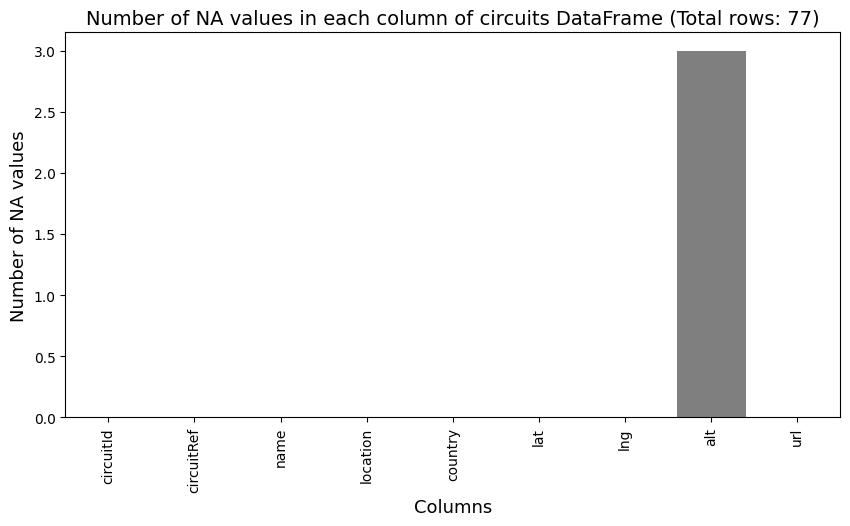

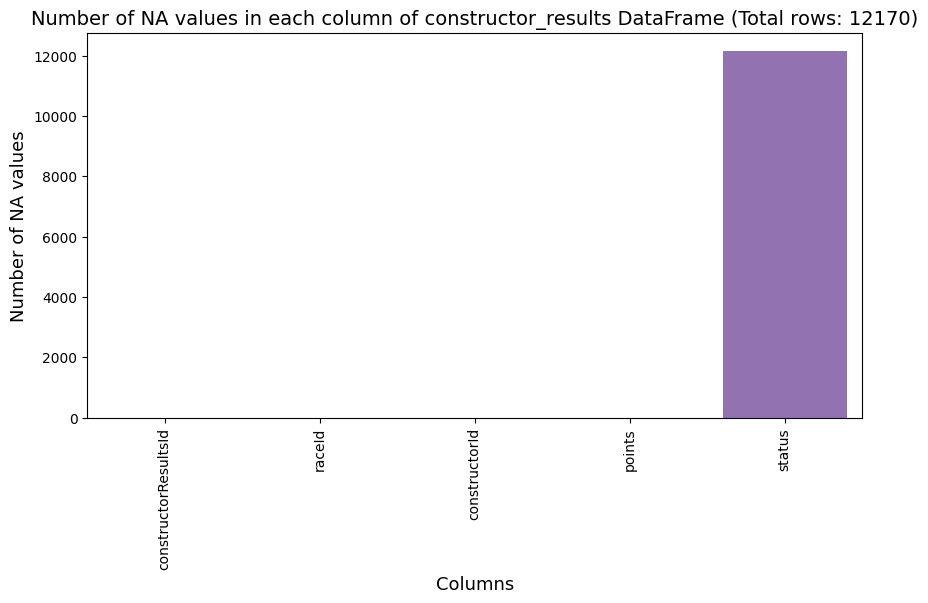

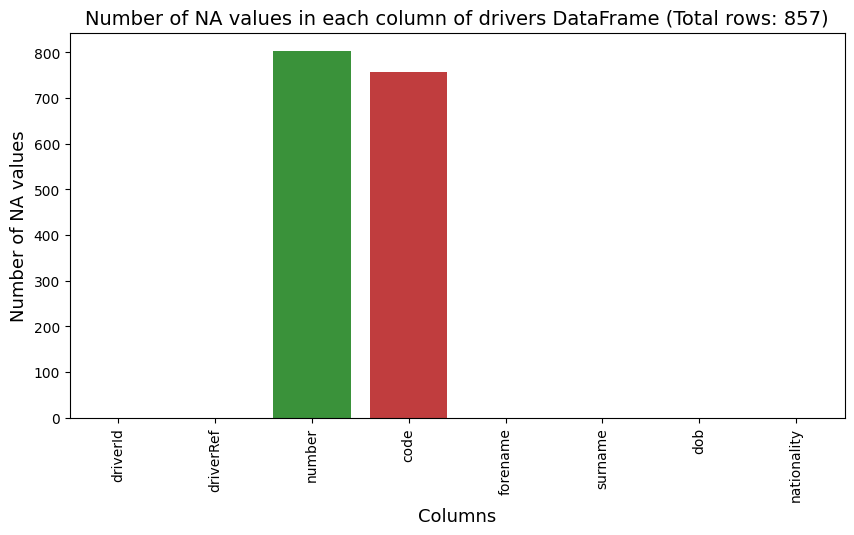

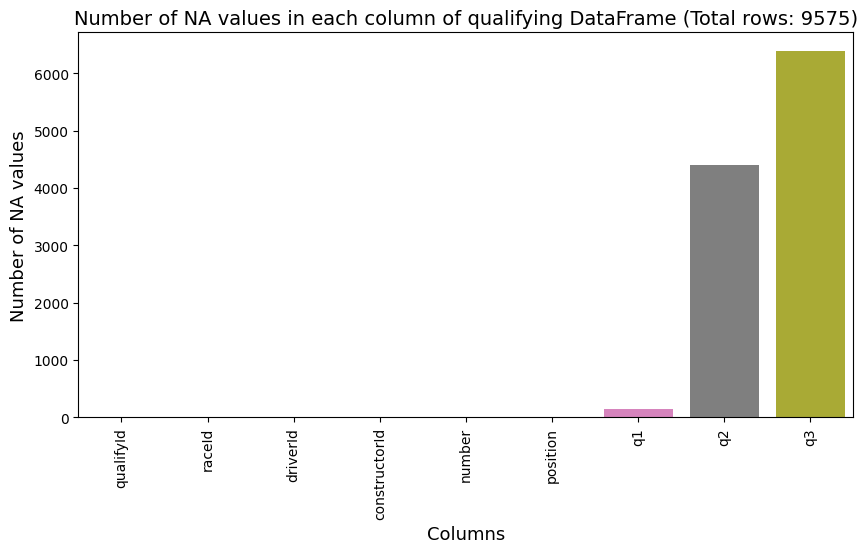

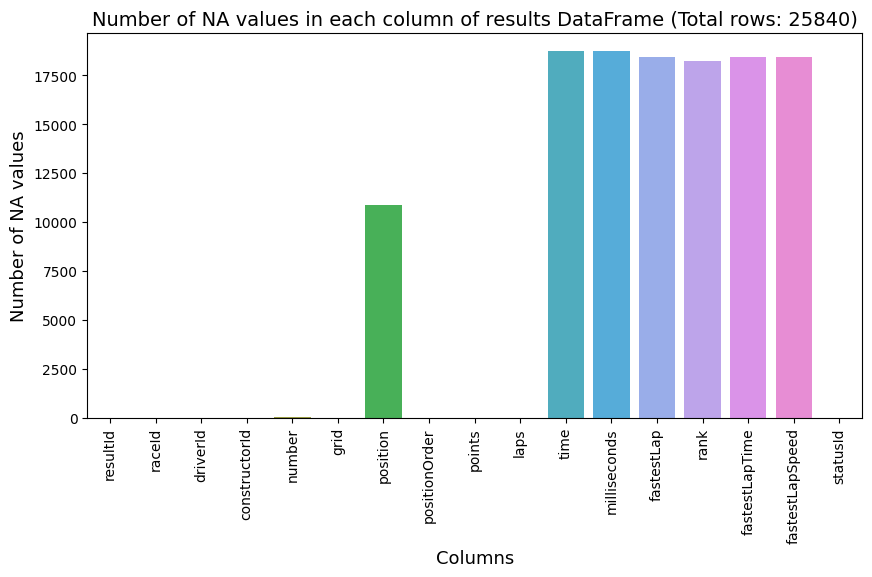

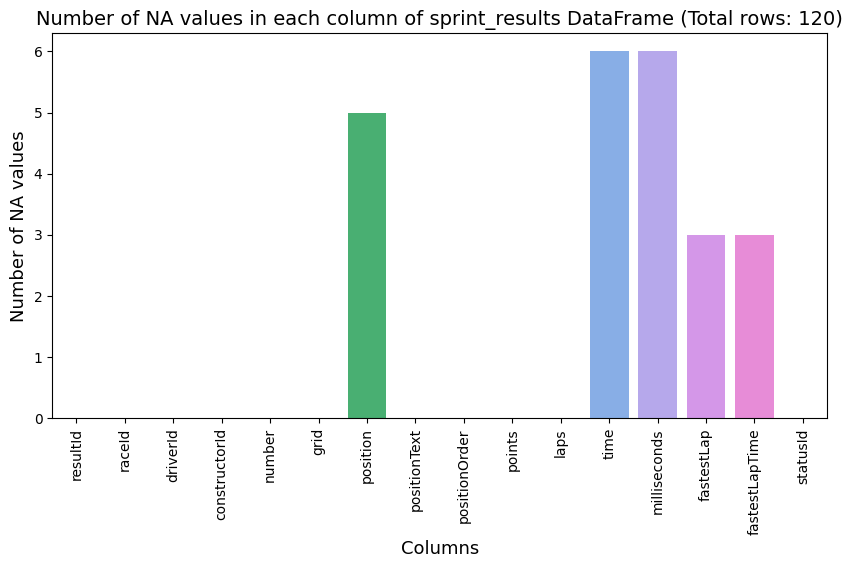

In [42]:
# Get total count of NA values in each dataframe column
na_count_dict = count_na(df_dict)

In [44]:
# Print the total count of NA values for each column in each dataframe
for name, counts in na_count_dict.items():
    print(f'DataFrame: {name}')
    for col, count in counts.items():
        print(f'  Column: {col}, NA Count: {count}')

DataFrame: circuits
  Column: circuitId, NA Count: 0
  Column: circuitRef, NA Count: 0
  Column: name, NA Count: 0
  Column: location, NA Count: 0
  Column: country, NA Count: 0
  Column: lat, NA Count: 0
  Column: lng, NA Count: 0
  Column: alt, NA Count: 3
  Column: url, NA Count: 0
DataFrame: constructor_results
  Column: constructorResultsId, NA Count: 0
  Column: raceId, NA Count: 0
  Column: constructorId, NA Count: 0
  Column: points, NA Count: 0
  Column: status, NA Count: 12153
DataFrame: drivers
  Column: driverId, NA Count: 0
  Column: driverRef, NA Count: 0
  Column: number, NA Count: 803
  Column: code, NA Count: 757
  Column: forename, NA Count: 0
  Column: surname, NA Count: 0
  Column: dob, NA Count: 0
  Column: nationality, NA Count: 0
DataFrame: qualifying
  Column: qualifyId, NA Count: 0
  Column: raceId, NA Count: 0
  Column: driverId, NA Count: 0
  Column: constructorId, NA Count: 0
  Column: number, NA Count: 0
  Column: position, NA Count: 0
  Column: q1, NA Coun

In [ ]:
results.head(5)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,podium
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,0
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,0


In [45]:
def count_na(df_dict: dict):
    """Count the number of NA values in each column for each dataframe and plot them."""
    na_count_dict = {}
    for name, df in df_dict.items():
        na_count = df.isna().sum()
        if any(na_count):  # if there are any NA values
            na_count_dict[name] = na_count
            total_values = df.shape[0]

            # Plotting
            plt.figure(figsize=(10, 5))
            sns.barplot(x=na_count.index, y=na_count)
            plt.xlabel('Columns', fontsize=13)
            plt.ylabel('Number of NA values', fontsize=13)
            plt.title(f'Number of NA values in each column of {name} DataFrame (Total rows: {total_values})', fontsize=14)
            plt.xticks(rotation=90)
            plt.show()
            print()
            print()


    return na_count_dict

In [46]:
na_count_dict = count_na(df_dict)

In [ ]:
def calculate_driver_performance_over_time(drivers, lap_times, races):
    # Group lap times by raceId and driverId and calculate total time
    driver_race_times = lap_times.groupby(['raceId', 'driverId'])['milliseconds'].sum().reset_index()

    # Merge with drivers dataframe to get driver names
    driver_race_times = pd.merge(driver_race_times, drivers[['driverId', 'forename', 'surname']], on='driverId')

    # Create a full name column
    driver_race_times['fullName'] = driver_race_times['forename'] + ' ' + driver_race_times['surname']
    driver_race_times.drop(['forename', 'surname'], axis=1, inplace=True)

    # Merge with races dataframe to get race year
    driver_race_times = pd.merge(driver_race_times, races[['raceId', 'year']], on='raceId')

    # Convert milliseconds to minutes
    driver_race_times['totalTimeMinutes'] = driver_race_times['milliseconds'] / 60000
    driver_race_times.drop('milliseconds', axis=1, inplace=True)

    return driver_race_times

driver_race_times = calculate_driver_performance_over_time(drivers, lap_times, races)


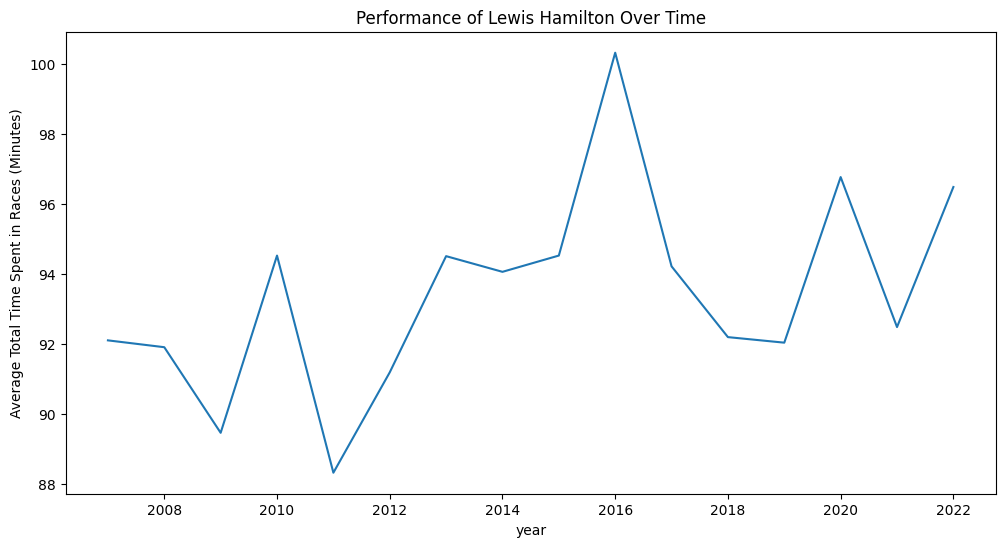

In [ ]:
def plot_driver_performance_over_time(driver_race_times, driver_name):
    # Filter data for the specific driver
    driver_data = driver_race_times[driver_race_times['fullName'] == driver_name]

    # Calculate yearly average
    yearly_avg = driver_data.groupby('year')['totalTimeMinutes'].mean().reset_index()

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='year', y='totalTimeMinutes', data=yearly_avg)
    plt.title(f'Performance of {driver_name} Over Time')
    plt.ylabel('Average Total Time Spent in Races (Minutes)')
    plt.show()

# Plot for a driver
plot_driver_performance_over_time(driver_race_times, 'Lewis Hamilton')


In [ ]:
def calculate_constructor_performance_over_time(constructors, constructor_standings, races):
    # Merge constructor_standings with constructors to get constructor names
    constructor_performance = pd.merge(constructor_standings, constructors[['constructorId', 'name']], on='constructorId')

    # Merge with races to get race year
    constructor_performance = pd.merge(constructor_performance, races[['raceId', 'year']], on='raceId')

    return constructor_performance

constructor_performance = calculate_constructor_performance_over_time(constructors, constructor_standings, races)


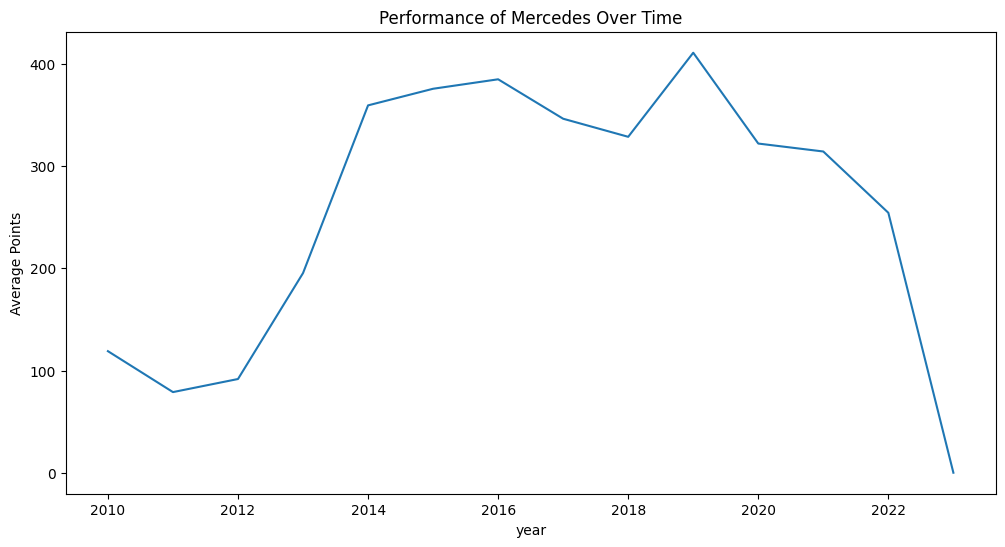

In [ ]:
def plot_constructor_performance_over_time(constructor_performance, constructor_name):
    # Filter data for the specific constructor
    constructor_data = constructor_performance[constructor_performance['name'] == constructor_name]

    # Calculate yearly average
    yearly_avg = constructor_data.groupby('year')['points'].mean().reset_index()

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='year', y='points', data=yearly_avg)
    plt.title(f'Performance of {constructor_name} Over Time')
    plt.ylabel('Average Points')
    plt.show()

# Plot for a constructor
plot_constructor_performance_over_time(constructor_performance, 'Mercedes')


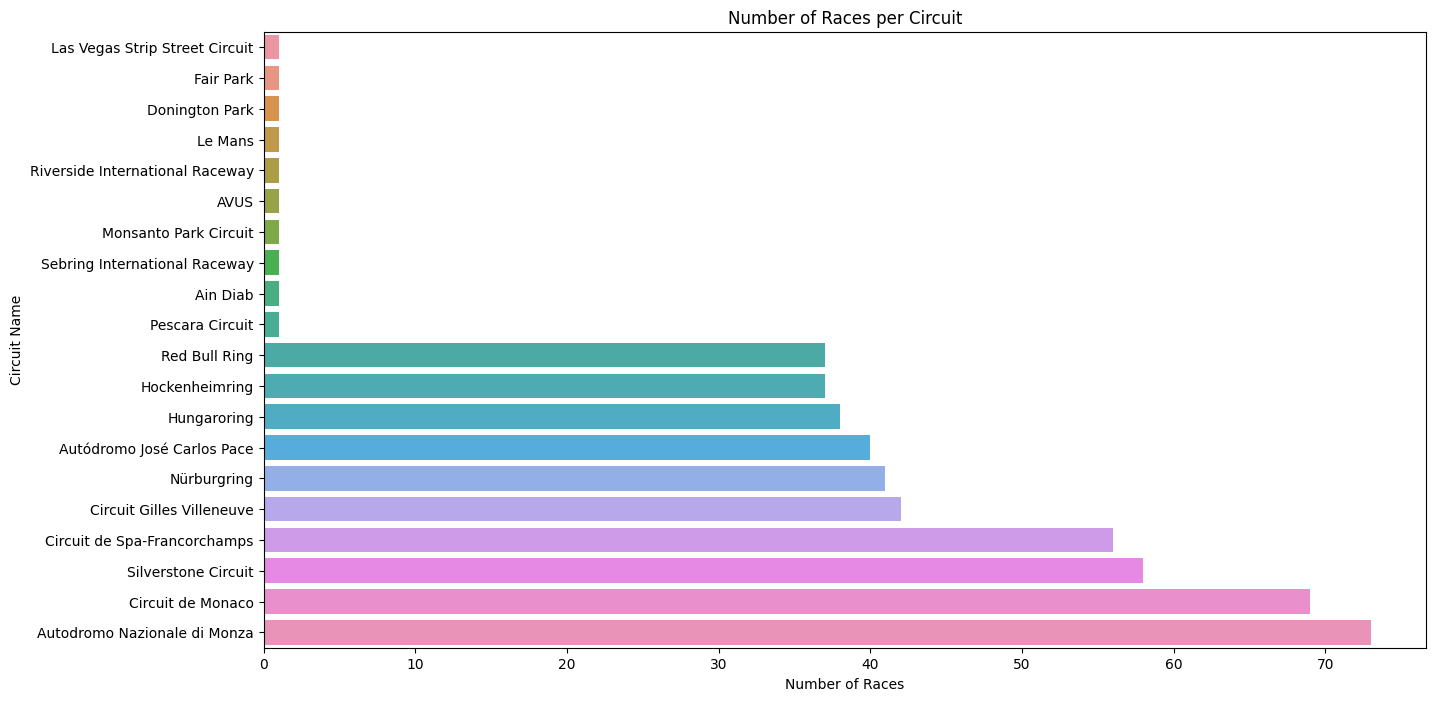

In [ ]:
def circuit_analysis(races, circuits):
    circuit_races = races[['circuitId', 'year']].groupby('circuitId').count().reset_index()
    circuit_races = pd.merge(circuit_races, circuits[['circuitId', 'name']], on='circuitId')
    circuit_races.rename(columns={'year': 'number_of_races'}, inplace=True)

    # Sorting values by number_of_races and reset index
    circuit_races = circuit_races.sort_values(by='number_of_races').reset_index(drop=True)

    # Get top 10 and bottom 10 circuits
    circuit_races = pd.concat([circuit_races[:10], circuit_races[-10:]])

    plt.figure(figsize=(15,8))
    sns.barplot(data=circuit_races, y='name', x='number_of_races')
    plt.title('Number of Races per Circuit')
    plt.xlabel('Number of Races')
    plt.ylabel('Circuit Name')
    plt.show()

    return circuit_races

circuit_races = circuit_analysis(races, circuits)



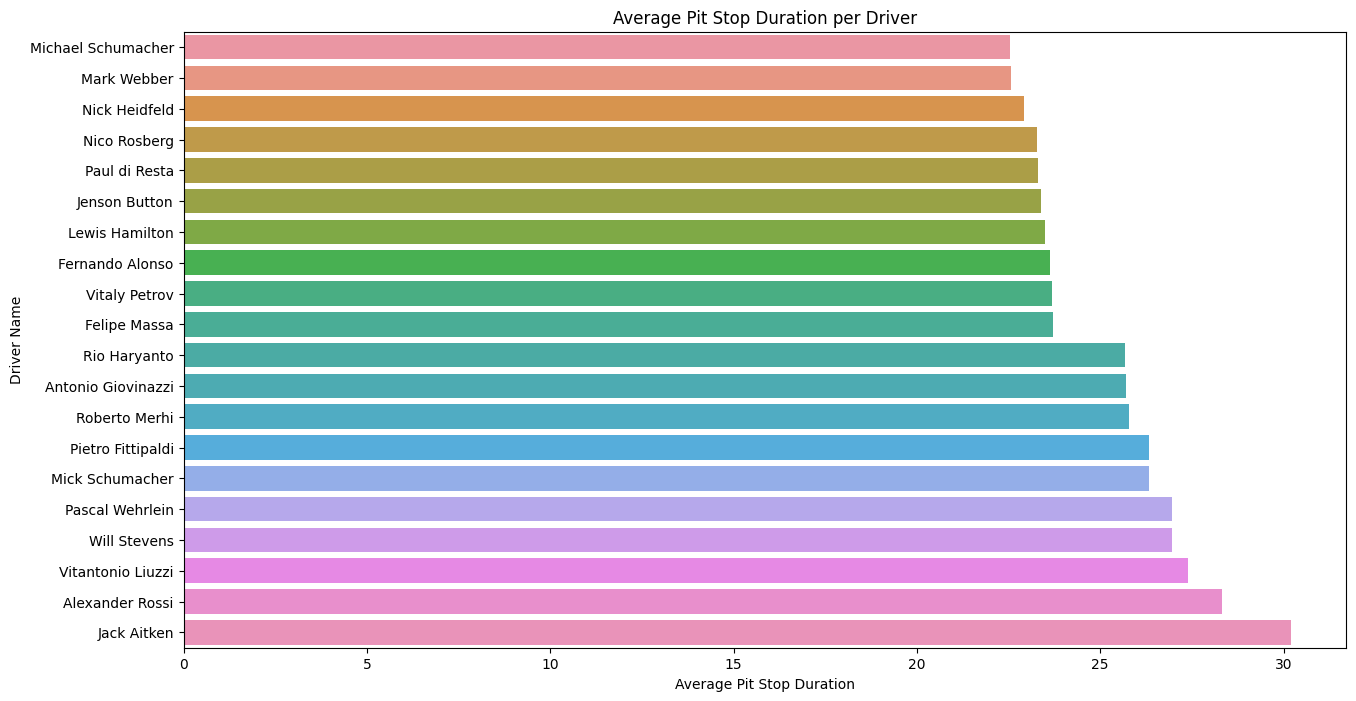

In [ ]:
def pit_stop_analysis(pit_stops, drivers):
    pit_stops['duration'] = pd.to_numeric(pit_stops['duration'], errors='coerce')
    avg_pit_stop_duration = pit_stops[['driverId', 'duration']].groupby('driverId').mean().reset_index()
    avg_pit_stop_duration = pd.merge(avg_pit_stop_duration, drivers[['driverId', 'forename', 'surname']], on='driverId')
    avg_pit_stop_duration['full_name'] = avg_pit_stop_duration['forename'] + ' ' + avg_pit_stop_duration['surname']
    avg_pit_stop_duration.drop(['forename', 'surname'], axis=1, inplace=True)

    # Sorting the values by duration and reset index
    avg_pit_stop_duration = avg_pit_stop_duration.sort_values(by='duration').reset_index(drop=True)

    # Get bottom 10 and top 10 drivers
    avg_pit_stop_duration = pd.concat([avg_pit_stop_duration[:10], avg_pit_stop_duration[-10:]])

    return avg_pit_stop_duration

avg_pit_stop_duration = pit_stop_analysis(pit_stops, drivers)

plt.figure(figsize=(15,8))
sns.barplot(data=avg_pit_stop_duration, y='full_name', x='duration')
plt.title('Average Pit Stop Duration per Driver')
plt.xlabel('Average Pit Stop Duration')
plt.ylabel('Driver Name')
plt.show()


In [ ]:
count_na
drop_na_rows
find_na
convert_time_to_seconds
handle_outliers
drop_columns
fill_missing
encode_categorical
calculate_age
load_data


In [ ]:
def fill_missing(df_list):
    """Fill missing values in a column."""
    for df, column, value in df_list:
        df[column] = df[column].fillna(value)
    return df_list

# Apply the function
# df_list = [(results, 'position', results['position'].mean()),
#            (pit_stops, 'milliseconds', pit_stops['milliseconds'].mean())]

# df_list = fill_missing(df_list)


In [ ]:
# Create a dictionary with dataframe names as keys and dataframes as values
df_dict = {
    'drivers': drivers,
    'races': races,
    'results': results,
    'lap_times': lap_times,
    'pit_stops': pit_stops,
    'constructors': constructors,
    'driver_standings': driver_standings
}

# Handle missing values
count_na(df_dict)


In [ ]:
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def encode_categorical(df, column):
    """Convert a column to categorical and then encode it to integers."""
    df[column] = df[column].astype('category').cat.codes
    return df

In [ ]:
def encode_categorical(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """One-Hot Encode categorical variables."""
    df = pd.get_dummies(df, columns=[column])
    return df

In [ ]:
# Create target variable
results['podium'] = results['positionOrder'].apply(lambda x: 1 if x <= 3 else 0)

# Merge necessary features from other dataframes
merged_df = results.merge(races[['raceId', 'circuitId']], on='raceId', how='left')
merged_df = merged_df.merge(drivers[['driverId', 'nationality']], on='driverId', how='left')
merged_df = merged_df.merge(constructors[['constructorId', 'name']], on='constructorId', how='left')

# Drop unnecessary columns
cols_to_drop = ['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'positionText', 'points', 'laps', 'time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId']
merged_df.drop(columns=cols_to_drop, inplace=True)

# Replace "\N" with np.nan and fillna
merged_df.replace("\\N", np.nan, inplace=True)

# Encoding categorical features
merged_df = pd.get_dummies(merged_df, drop_first=True)

# Scaling numeric features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = merged_df.select_dtypes(include=['int64', 'float64']).columns
merged_df[numerical_features] = scaler.fit_transform(merged_df[numerical_features])



In [ ]:
merged_df.head()

,grid,positionOrder,podium,circuitId,position_10,position_11,position_12,position_13,position_14,position_15,...,name_Turner,name_Tyrrell,name_Vanwall,name_Veritas,name_Virgin,name_Watson,name_Wetteroth,name_Williams,name_Wolf,name_Zakspeed
0,-1.405252,-1.539890,2.632264,-1.210992,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.853039,-1.410226,2.632264,-1.210992,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.576933,-1.280562,2.632264,-1.210992,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-0.024720,-1.150898,-0.379901,-1.210992,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.129146,-1.021234,-0.379901,-1.210992,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Transform 'podium' into a categorical column
def categorize_podium(position):
    if position == 1:
        return '1st'
    elif position == 2:
        return '2nd'
    elif position == 3:
        return '3rd'
    else:
        return 'Not-On-Podium'

merged_df['podium'] = merged_df['podium'].apply(categorize_podium)
merged_df['podium'] = merged_df['podium'].astype('category')


In [ ]:
print(y_train.unique())

['Not-On-Podium']
Categories (1, object): ['Not-On-Podium']


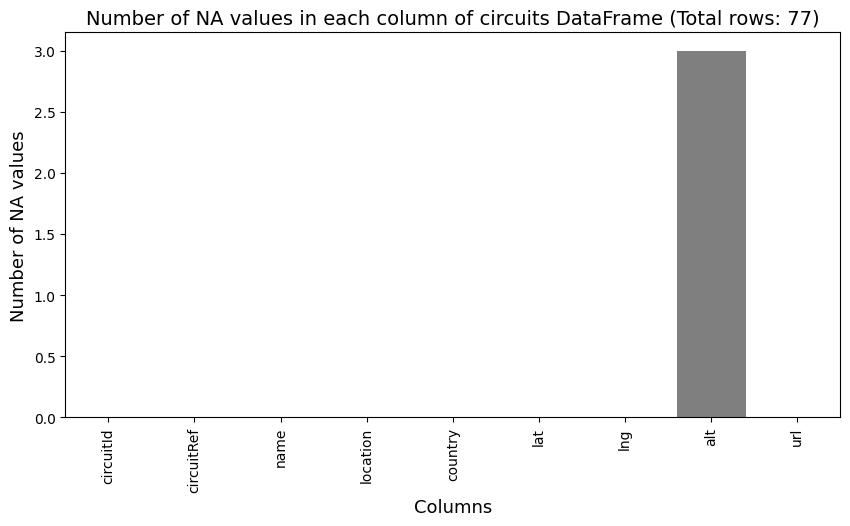

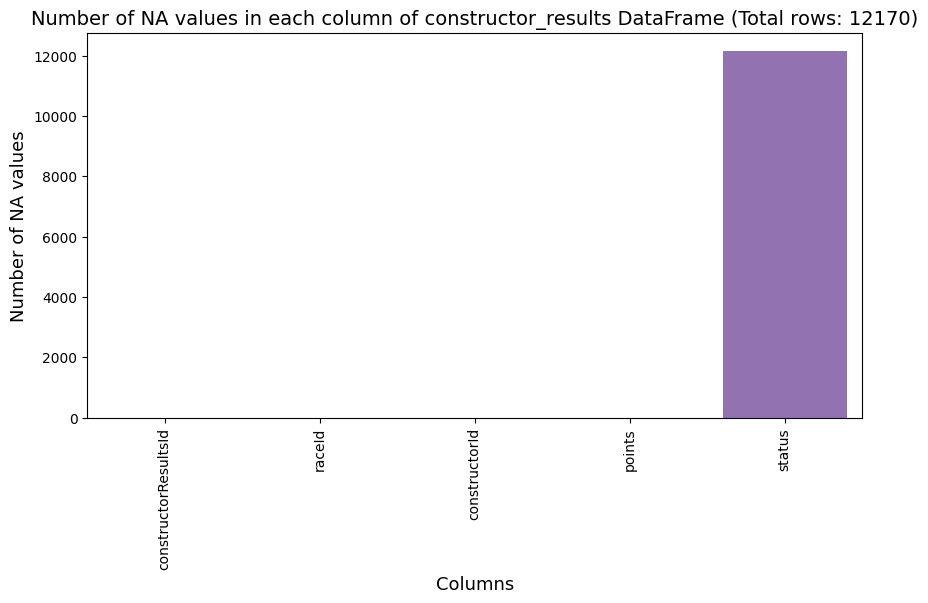

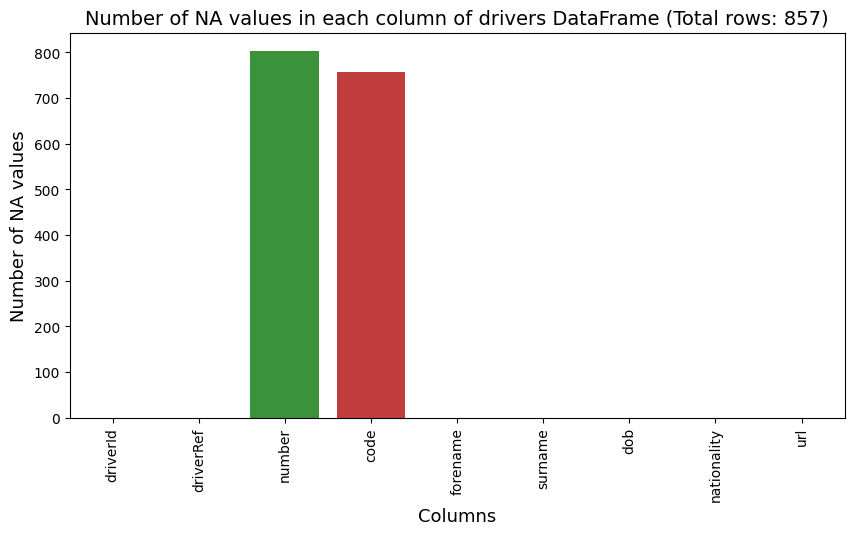

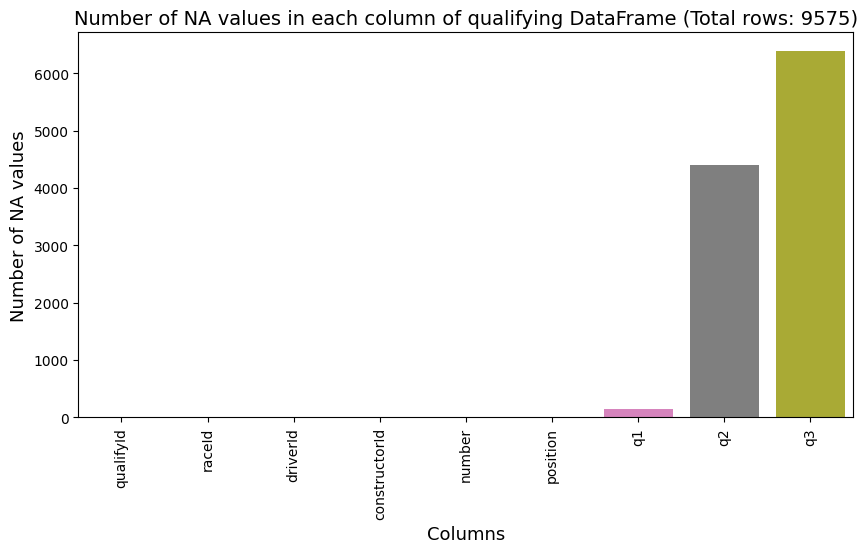

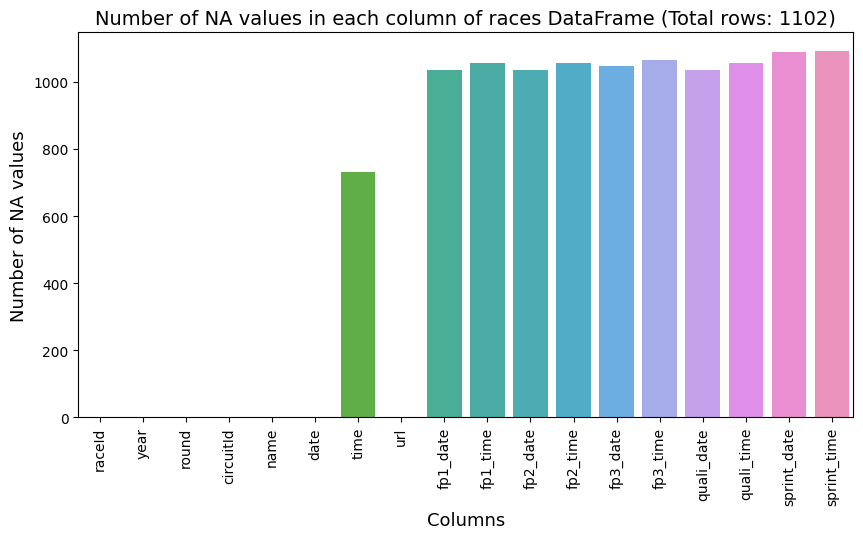

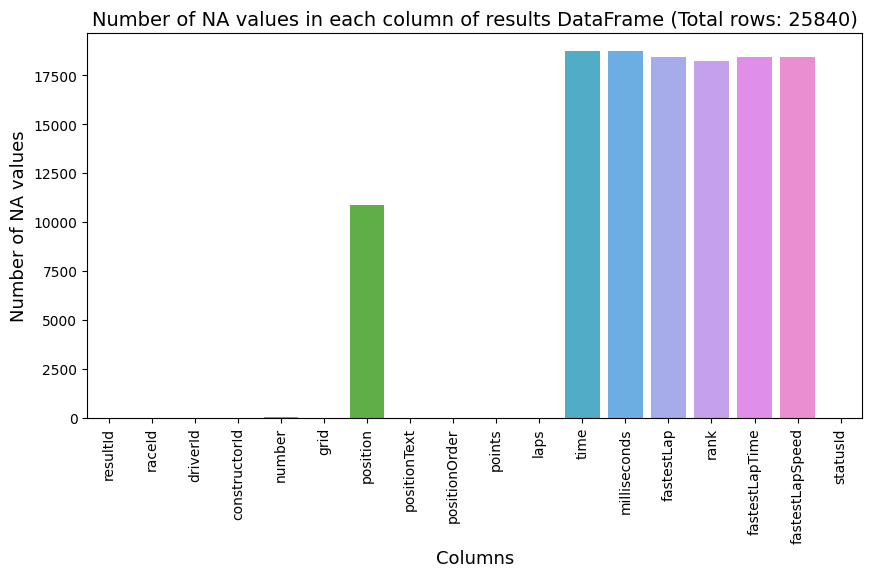

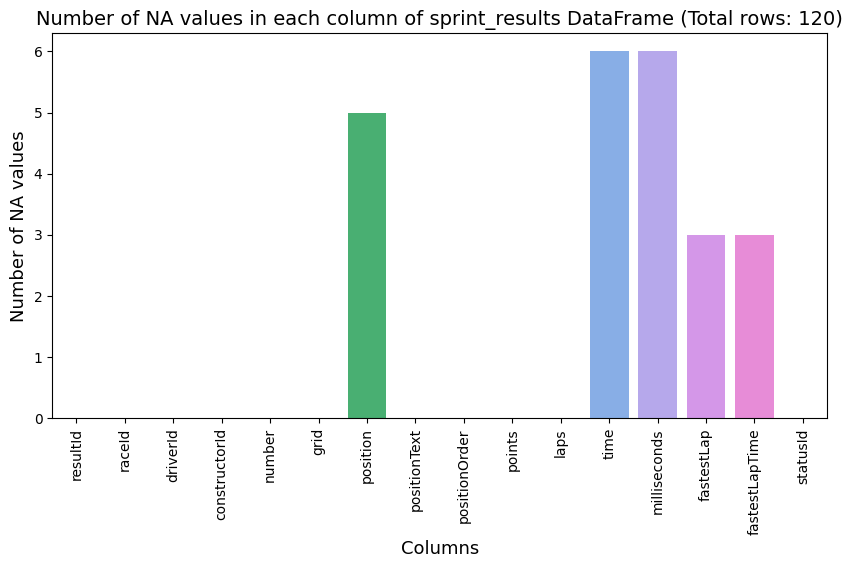

In [ ]:
na_count_dict = count_na(df_dict)

In [ ]:
def pit_stop_analysis(pit_stops, drivers):
    pit_stops['duration'] = pd.to_numeric(pit_stops['duration'], errors='coerce')
    avg_pit_stop_duration = pit_stops[['driverId', 'duration']].groupby('driverId').mean().reset_index()
    avg_pit_stop_duration = pd.merge(avg_pit_stop_duration, drivers[['driverId', 'forename', 'surname']], on='driverId')
    avg_pit_stop_duration['full_name'] = avg_pit_stop_duration['forename'] + ' ' + avg_pit_stop_duration['surname']
    avg_pit_stop_duration.drop(['forename', 'surname'], axis=1, inplace=True)

    return avg_pit_stop_duration

avg_pit_stop_duration = pit_stop_analysis(pit_stops, drivers)

plt.figure(figsize=(15,8))
sns.barplot(data=avg_pit_stop_duration, y='full_name', x='duration')
plt.title('Average Pit Stop Duration per Driver')
plt.xlabel('Average Pit Stop Duration')
plt.ylabel('Driver Name')
plt.show()


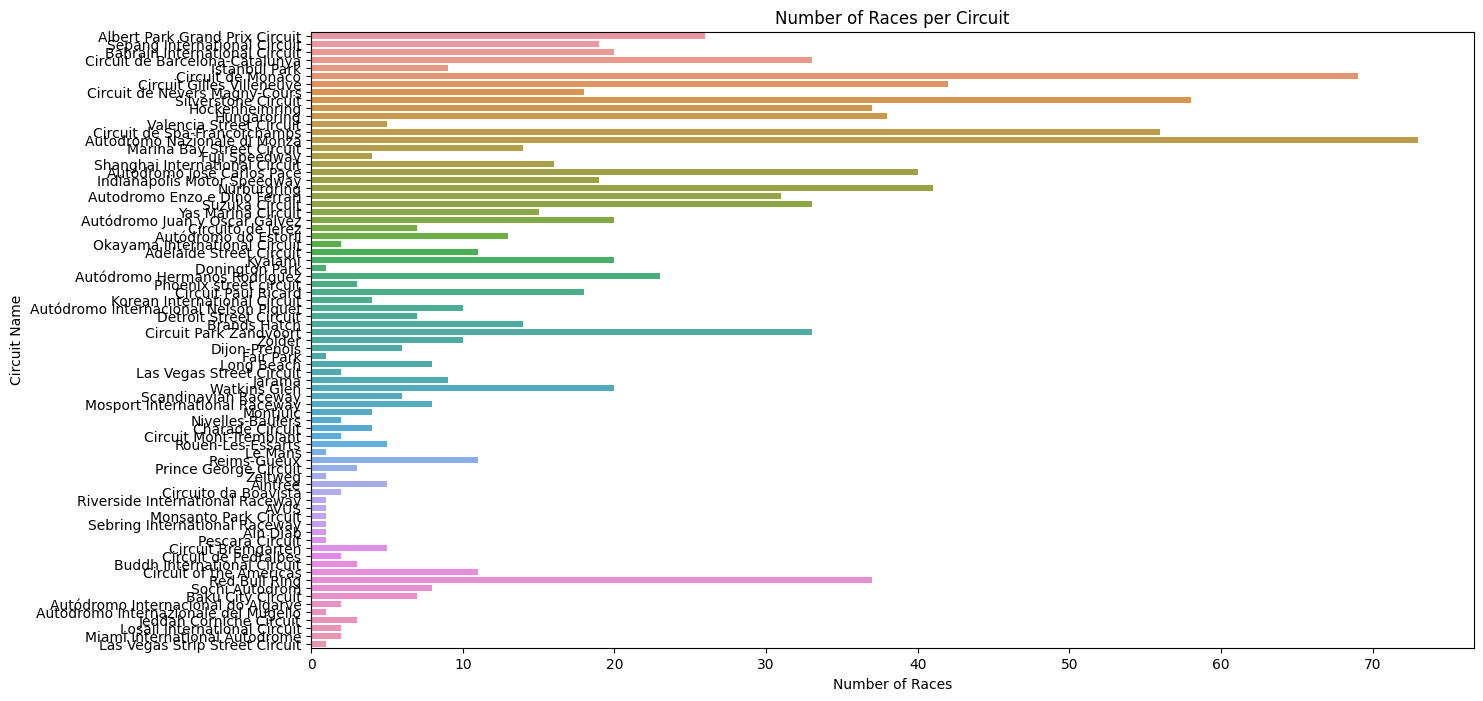

In [ ]:
def circuit_analysis(races, circuits):
    circuit_races = races[['circuitId', 'year']].groupby('circuitId').count().reset_index()
    circuit_races = pd.merge(circuit_races, circuits[['circuitId', 'name']], on='circuitId')
    circuit_races.rename(columns={'year': 'number_of_races'}, inplace=True)
    return circuit_races


circuit_races = circuit_analysis(races, circuits)

plt.figure(figsize=(15,8))
sns.barplot(data=circuit_races, y='name', x='number_of_races')
plt.title('Number of Races per Circuit')
plt.xlabel('Number of Races')
plt.ylabel('Circuit Name')
plt.show()
